In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv('pr13_final_selected.csv')

In [3]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_50,Weighted_Std_50,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal
0,0.0,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.0,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,0.0,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0,0
3,0.0,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014633,0.011367,0,0
4,0.0,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,0.0,0.0,ZM,technology,usa,67.570000,2023,8,240,0,...,67.893879,2.853087,68.613516,4.308918,69.996574,8.684420,0.028406,1.869995,0,0
98912,0.0,0.0,ZM,technology,usa,71.720001,2023,9,244,4,...,68.007660,2.836239,68.690208,3.909056,70.196486,8.794551,-0.001920,-0.129997,0,0
98913,0.0,0.0,ZM,technology,usa,72.059998,2023,9,251,4,...,68.782732,3.223557,69.500643,4.125710,71.246183,9.291970,0.061418,4.150002,0,0
98914,0.0,0.0,ZM,technology,usa,71.110001,2023,9,258,4,...,69.280983,3.336209,69.959714,4.126633,71.726531,9.222725,0.004741,0.339996,0,0


In [4]:
df.columns

Index(['Dividends', 'Stock Splits', 'Ticker', 'Industry_Tag', 'Country',
       'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
       'Close_Lag_1', 'Volume_Lag_1', 'Days_Since_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_20',
       'Close_Lag_50', 'Close_Lag_80', 'Close_Lag_100', 'Weighted_Mean_2',
       'Weighted_Std_2', 'Weighted_Mean_3', 'Weighted_Std_3',
       'Weighted_Mean_4', 'Weighted_Std_4', 'Weighted_Mean_5',
       'Weighted_Std_5', 'Weighted_Mean_20', 'Weighted_Std_20',
       'Weighted_Mean_50', 'Weighted_Std_50', 'Weighted_Mean_80',
       'Weighted_Std_80', 'Weighted_Mean_100', 'Weighted_Std_100',
       'return_since_last_entry', 'diff_since_last_entry', 'Dividends_signal',
       'Stock Splits_signal'],
      dtype='object')

In [6]:
#create target columns: price_tomorrow for regression based prediction and price_up for classification based prediction
df['price_tomorrow'] = df.groupby('Ticker')['Close'].shift(-1)
df['price_up'] = (df['price_tomorrow'] > df['Close'] * 1.01).astype(int) #price up only 1 if it is up more than 1% to avoid noise

In [7]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal,price_tomorrow,price_up
0,0.0,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.776801,0
1,0.0,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.788168,1
2,0.0,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0,0,0.754065,0
3,0.0,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,0.014633,0.011367,0,0,0.702910,0
4,0.0,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0,0,0.660754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,0.0,0.0,ZM,technology,usa,67.570000,2023,8,240,0,...,68.613516,4.308918,69.996574,8.684420,0.028406,1.869995,0,0,71.720001,1
98912,0.0,0.0,ZM,technology,usa,71.720001,2023,9,244,4,...,68.690208,3.909056,70.196486,8.794551,-0.001920,-0.129997,0,0,72.059998,0
98913,0.0,0.0,ZM,technology,usa,72.059998,2023,9,251,4,...,69.500643,4.125710,71.246183,9.291970,0.061418,4.150002,0,0,71.110001,0
98914,0.0,0.0,ZM,technology,usa,71.110001,2023,9,258,4,...,69.959714,4.126633,71.726531,9.222725,0.004741,0.339996,0,0,69.339996,0


In [8]:
df = df.dropna(subset=['price_tomorrow', 'price_up'])

In [9]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal,price_tomorrow,price_up
0,0.0,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.776801,0
1,0.0,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.788168,1
2,0.0,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0,0,0.754065,0
3,0.0,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,0.014633,0.011367,0,0,0.702910,0
4,0.0,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0,0,0.660754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98910,0.0,0.0,ZM,technology,usa,67.699997,2023,8,237,4,...,68.436484,4.830039,69.849859,9.011001,0.007191,0.470001,0,0,67.570000,0
98911,0.0,0.0,ZM,technology,usa,67.570000,2023,8,240,0,...,68.613516,4.308918,69.996574,8.684420,0.028406,1.869995,0,0,71.720001,1
98912,0.0,0.0,ZM,technology,usa,71.720001,2023,9,244,4,...,68.690208,3.909056,70.196486,8.794551,-0.001920,-0.129997,0,0,72.059998,0
98913,0.0,0.0,ZM,technology,usa,72.059998,2023,9,251,4,...,69.500643,4.125710,71.246183,9.291970,0.061418,4.150002,0,0,71.110001,0


In [11]:
exclude = [
    'Ticker', 'Industry_Tag', 'Country',
    'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
    'price_up', 'price_tomorrow',
    'Dividends', 'Stock Splits'
]

candidate_features = [col for col in df.columns if col not in exclude and df[col].dtype != 'object']
candidate_features

['Close_Lag_1',
 'Volume_Lag_1',
 'Days_Since_Lag_1',
 'Close_Lag_2',
 'Close_Lag_3',
 'Close_Lag_4',
 'Close_Lag_5',
 'Close_Lag_20',
 'Close_Lag_50',
 'Close_Lag_80',
 'Close_Lag_100',
 'Weighted_Mean_2',
 'Weighted_Std_2',
 'Weighted_Mean_3',
 'Weighted_Std_3',
 'Weighted_Mean_4',
 'Weighted_Std_4',
 'Weighted_Mean_5',
 'Weighted_Std_5',
 'Weighted_Mean_20',
 'Weighted_Std_20',
 'Weighted_Mean_50',
 'Weighted_Std_50',
 'Weighted_Mean_80',
 'Weighted_Std_80',
 'Weighted_Mean_100',
 'Weighted_Std_100',
 'return_since_last_entry',
 'diff_since_last_entry',
 'Dividends_signal',
 'Stock Splits_signal']

In [12]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X_discrete = pd.DataFrame()

# Discretize each feature into quantile bins (as categories)
for feature in candidate_features:
    try:
        X_discrete[feature] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop')
    except Exception:
        continue  # skip features that can't be binned

X_discrete = X_discrete.fillna(0)

# Compute Mutual Information scores for classification
mi_class_scores = mutual_info_classif(X_discrete, df['price_up'], discrete_features=True)

mi_class_df = pd.DataFrame({
    'Feature': X_discrete.columns,
    'MI_Score_Class': mi_class_scores
}).sort_values(by='MI_Score_Class', ascending=False)

In [13]:
from sklearn.feature_selection import mutual_info_regression

# Same discretized features, but regression target
mi_reg_scores = mutual_info_regression(X_discrete, df['price_tomorrow'], discrete_features=True)

mi_reg_df = pd.DataFrame({
    'Feature': X_discrete.columns,
    'MI_Score_Reg': mi_reg_scores
}).sort_values(by='MI_Score_Reg', ascending=False)

In [14]:
mi_df = mi_class_df.merge(mi_reg_df, on='Feature')
mi_df = mi_df.sort_values(by=['MI_Score_Class', 'MI_Score_Reg'], ascending=False)

print("Top Features (Classification + Regression MI Scores):")
print(mi_df.head(15))

Top Features (Classification + Regression MI Scores):
                    Feature  MI_Score_Class  MI_Score_Reg
0   return_since_last_entry        0.002635      0.025306
1          Weighted_Mean_80        0.002038      1.799214
2         Weighted_Mean_100        0.002007      1.754195
3          Weighted_Mean_20        0.001974      1.980381
4          Weighted_Mean_50        0.001931      1.879052
5           Weighted_Mean_3        0.001905      2.068028
6           Weighted_Mean_2        0.001902      2.074072
7           Weighted_Mean_4        0.001900      2.063257
8           Weighted_Mean_5        0.001894      2.057386
9               Close_Lag_1        0.001890      2.079883
10              Close_Lag_2        0.001866      2.031950
11              Close_Lag_3        0.001858      1.990168
12            Close_Lag_100        0.001857      1.023720
13             Close_Lag_80        0.001856      1.115713
14              Close_Lag_5        0.001844      1.923969


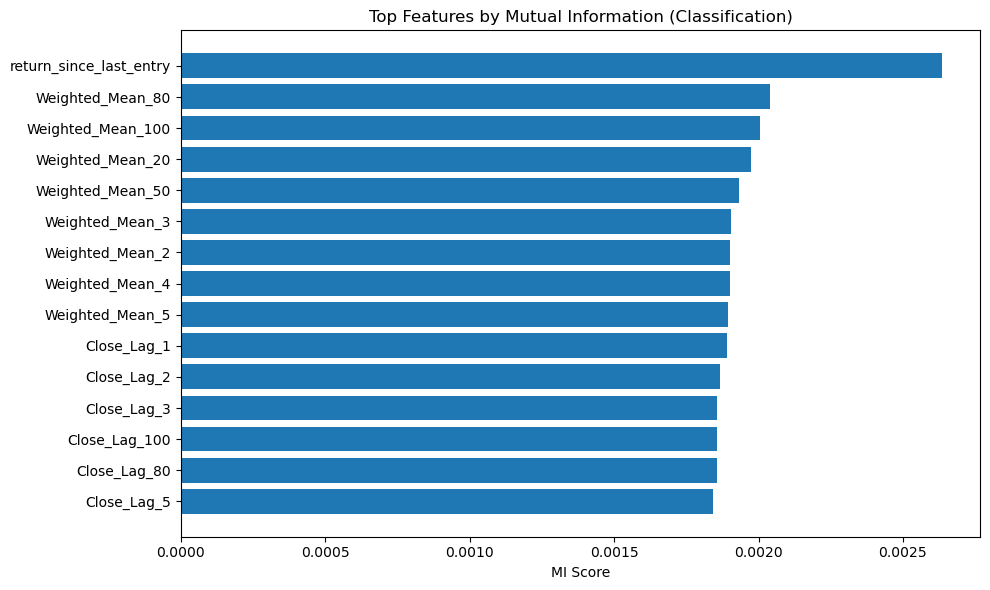

In [15]:
import matplotlib.pyplot as plt

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'].head(top_n)[::-1], mi_df['MI_Score_Class'].head(top_n)[::-1])
plt.title("Top Features by Mutual Information (Classification)")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()

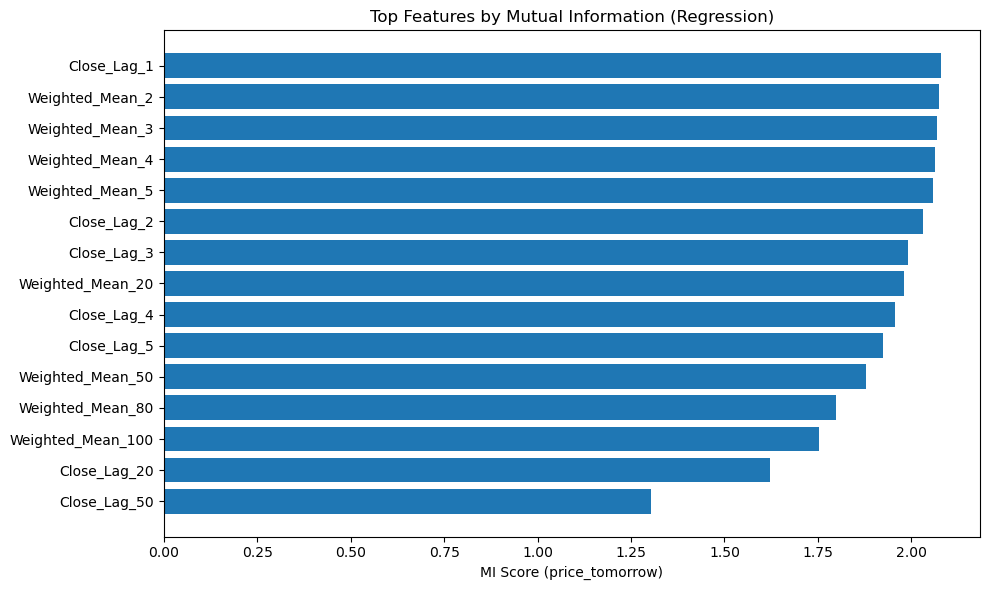

In [17]:
mi_df_sorted_reg = mi_df.sort_values(by='MI_Score_Reg', ascending=False)

# Plot top N features
top_n = 15

plt.figure(figsize=(10, 6))
plt.barh(
    mi_df_sorted_reg['Feature'].head(top_n)[::-1],
    mi_df_sorted_reg['MI_Score_Reg'].head(top_n)[::-1]
)
plt.title("Top Features by Mutual Information (Regression)")
plt.xlabel("MI Score (price_tomorrow)")
plt.tight_layout()
plt.show()